# Statistical Analysis and Cluster Analysis

## Overview
In this lecture, we will learn how to cluster geographical regions based on their attributes. We will start from simple statistics, which are correlations and regression. Then, we move on to clustering analysis and investigate the two well-known methods, K-means clustering, and hierarchical clustering. 

In python, there are numerous packages that support statistics and cluster analysis. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import geopandas as gpd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from sklearn.cluster import KMeans, AgglomerativeClustering

## Correlation and Regression: Boston housing price

Focusing on Boston, we will investigate how the variables, such as crime rate, number of rooms, etc, are correlated with the housing price. Then, examine how well their variations explain the variations in housing price, with Ordinary Least Squares (OLS) regression. 

The followings are the columns in the `boston` DataFrame. The data is obtained from http://lib.stat.cmu.edu/datasets/boston.
```python
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per \$10,000
#  PTRATIO  pupil-teacher ratio by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's
```

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
data = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO', 'B', 'LSTAT'])
target = raw_df.values[1::2, 2]
boston = data.merge(pd.DataFrame(target, columns=['MEDV']), left_index=True, right_index=True)
boston.drop(columns=['B'], inplace=True)

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Correlation

Correlation means a statistical relationship between two variables, regardless of causality. The range of output is between -1 (negative) and +1 (positive) with 0 implying no correlation. There are several methods that reveal the correlation between variables, but in our lecture, we will investigate two major ones. 
* **Pearson's correlation** measures the linear relationship between two datasets. The calculation of the p-value relies on the assumption that each dataset is normally distributed. 
* **Spearman's correlation** does not assume that both datasets are normally distributed, unlike Pearson's correlation. It sorts the distribution of each variable, respectively, then compares their correlation. 

For the implementation in Python, we will utilize `scipy` package. The implementation of both Pearson and Spearman correlation is straightforward. They just require two inputs; distributions of two variables. For more information, visit <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html>scipy.stats.pearsonr</a> or <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html>scipy.stats.spearmanr</a>. 



In [4]:
pearsonr_result = pearsonr(boston['CRIM'], boston['MEDV'])
print(pearsonr_result)
print(f"Pearson's r between crime rate and home median value has r {round(pearsonr_result[0],2)} and p-value {round(pearsonr_result[1],2)}")

(-0.3883046085868116, 1.1739870821941207e-19)
Pearson's r between crime rate and home median value has r -0.39 and p-value 0.0


In [5]:
spearmanr_result = spearmanr(boston['CRIM'], boston['MEDV'])
print(spearmanr_result)
print(f"Spearman correlation between crime rate and home median value has r {round(spearmanr_result[0],2)} and p-value {round(spearmanr_result[1],2)}")

SpearmanrResult(correlation=-0.5588909488368801, pvalue=6.5533358892281775e-43)
Spearman correlation between crime rate and home median value has r -0.56 and p-value 0.0


In [6]:
independent_variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
dependent_variable = ['MEDV']

for var in independent_variables:
    result = pearsonr(boston[var], boston[dependent_variable])
    print(f'Correlation between {var} and home median value: r {round(result[0][0], 2)}, p-val {round(result[1], 2)}')

Correlation between CRIM and home median value: r -0.39, p-val 0.0
Correlation between ZN and home median value: r 0.36, p-val 0.0
Correlation between INDUS and home median value: r -0.48, p-val 0.0
Correlation between CHAS and home median value: r 0.18, p-val 0.0
Correlation between NOX and home median value: r -0.43, p-val 0.0
Correlation between RM and home median value: r 0.7, p-val 0.0
Correlation between AGE and home median value: r -0.38, p-val 0.0
Correlation between DIS and home median value: r 0.25, p-val 0.0
Correlation between RAD and home median value: r -0.38, p-val 0.0
Correlation between TAX and home median value: r -0.47, p-val 0.0
Correlation between PTRATIO and home median value: r -0.51, p-val 0.0
Correlation between LSTAT and home median value: r -0.74, p-val 0.0


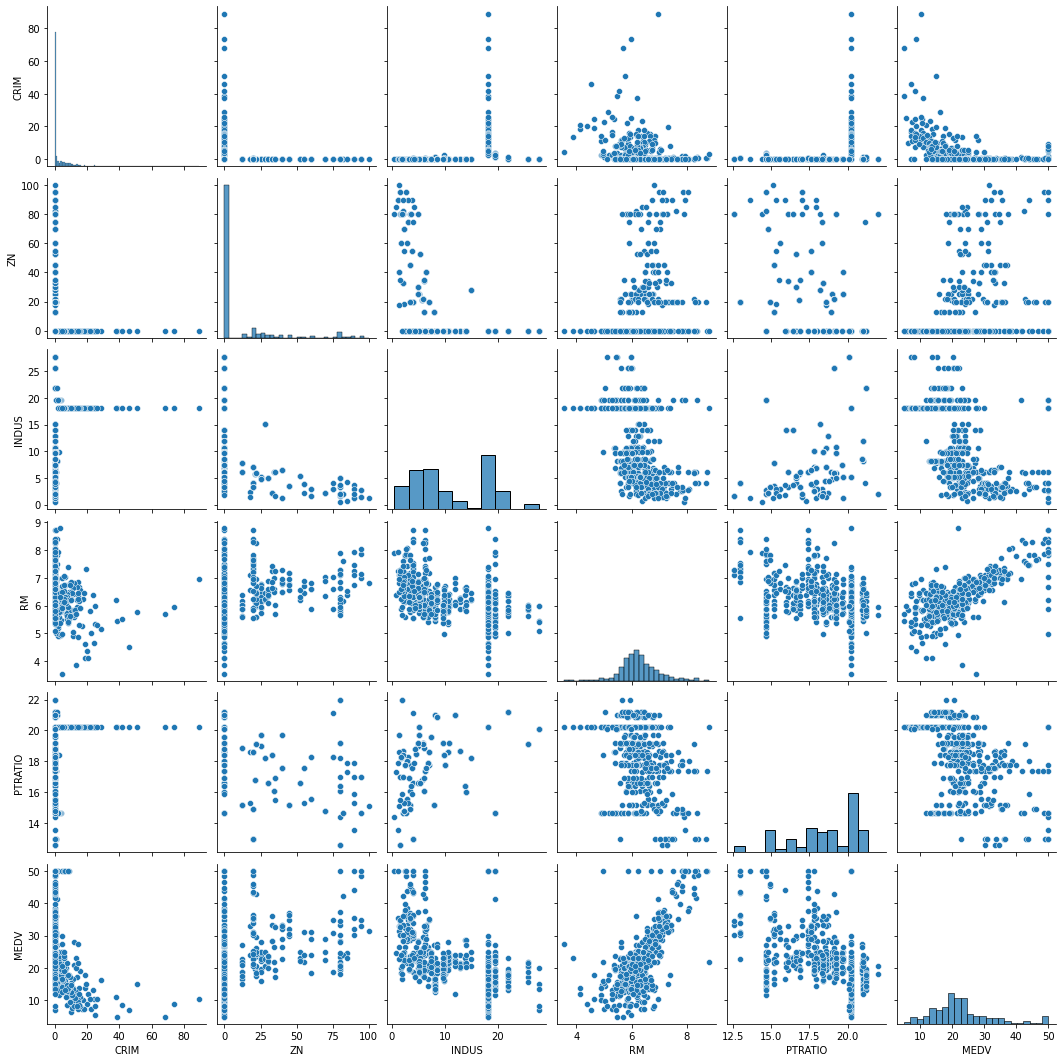

In [7]:
sns.pairplot(boston[['CRIM', 'ZN', 'INDUS', 'RM', 'PTRATIO', 'MEDV']])
plt.show()

### Regression: Ordinary least squares (OLS)

Unlike correlation, regression requires a casualty between two variables, meaning that one variable has an impact on the other variable. Therefore, we name variables as **independent variables** and **dependent variables**. Here, we assumes that `'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'` variables may have impacted on the housing price in Boston `MEDV`. 

For the implementation in Python, we utilize `statsmodels` package. Here, you need to be careful which variable has an impact on which variable. For more information, visit <a hef=https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html> statsmodels.regression.linear_model.OLS</a>.

In [8]:
# Independent variables
ind = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]

# Dependent variables (Median value of owner-occupied homes in $1000's)
dep = boston[['MEDV']]

ind = sm.add_constant(ind)
model = sm.OLS(dep, ind)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          2.23e-133
Time:                        19:57:55   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.0

The resulted summary provides extensive information, but the major thing we need to focus are `R-squared`, `Adj. R-squared` and `Prob (F-statistic)`. 

Although the entire model was significant, this implementation has some variables (`INDUS`, `AGE`) provided statistically insignificant results, so that we need to run the model one more time with two variables removed. 

In [9]:
# Independent variables
## Insignificant varaibles (INDUS, AGE) removed
ind = boston[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']]

# Dependent variables (Median value of owner-occupied homes in $1000's)
dep = boston[['MEDV']]

ind = sm.add_constant(ind)
model = sm.OLS(dep, ind)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     136.8
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.73e-135
Time:                        19:57:55   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      4.903      8.454      0.0

Once the OLS model is constructed, we can predict housing prices in Boston (`MEDV`) based on some arbitrary inputs. The order of the input still needs to match with the original input data. For more information, please visit <a href=https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.predict.html>`statsmodels.regression.linear_model.OLS.predict`</a>.

The original order in the current model is `'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'`.

In [10]:
arbitrary_nums = [1,  # Constant
                  0.25651,  # CRIM
                  0,        # ZN
                  0,        # CHAS
                  0.538,    # NOX
                  6.2085,   # RM
                  3.2074,   # DIS
                  5.0,      # RAD
                  330.0,    # TAX
                  19.05,    # PTRATIO
                  11.36,    # LSTAT
                 ]

results.predict(arbitrary_nums)

array([22.95695545])

In [11]:
results.params

const      41.451747
CRIM       -0.121665
ZN          0.046191
CHAS        2.871873
NOX       -18.262427
RM          3.672957
DIS        -1.515951
RAD         0.283932
TAX        -0.012292
PTRATIO    -0.930961
LSTAT      -0.546509
dtype: float64

---
### *Exercise*

Use the California dataset below and conduct pearson's correlation, spearman's correlation, and OLS. The `cali` GeoDataFrame stores Median income (`MedInc`), House age (`HouseAge`), Average room counts (`AveRooms`), Average bedroom counts (`AveBedrms`), Population (`Population`), Average occupations (`AveOccup`), and Median house values (`MedHouseVal`) per census block groups. 

1. Calculate pearson's correlation between Median income (`MedInc`) and Median house values (`MedHouseVal`), then store its correlation coefficient as `pearsonr_coef`, only if the coefficient is statistically significant (p-value < 0.05). 
2. Conduct spearman's correlation analysis between Median income (`MedInc`) and Median house values (`MedHouseVal`), then store its correlation coefficient as `spearmanr_coef`, only if the coefficient is statistically significant (p-value < 0.05). 
3. Conduct OLS with every valid columns in the `cali` GeoDataFrame. Based on the result, predict a median housing price in case of the following condition and save the prediction result as `prediction`. 
    * Constant: 1
    * Median income (`MedInc`): 10
    * House age (`HouseAge`): 20
    * Average room counts (`AveRooms`): 5
    * Average bedroom counts (`AveBedrms`): 3
    * Population (`Population`): 5000
    * Average occupations (`AveOccup`): 4
   
This code will help you to download the dataset. 
```python
from sklearn.datasets import fetch_california_housing

data_ = fetch_california_housing(as_frame=True)
cali = data_['frame']
cali = gpd.GeoDataFrame(cali, geometry=gpd.points_from_xy(cali.Longitude, cali.Latitude, crs='EPSG:4326'))
cali
```
---

In [12]:
from sklearn.datasets import fetch_california_housing

data_ = fetch_california_housing(as_frame=True)
cali = data_['frame']
cali = gpd.GeoDataFrame(cali, geometry=gpd.points_from_xy(cali.Longitude, cali.Latitude, crs='EPSG:4326'))
cali

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,geometry
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,POINT (-122.23000 37.88000)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,POINT (-122.22000 37.86000)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,POINT (-122.24000 37.85000)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,POINT (-122.25000 37.85000)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,POINT (-122.25000 37.85000)
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,POINT (-121.09000 39.48000)
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,POINT (-121.21000 39.49000)
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,POINT (-121.22000 39.43000)
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,POINT (-121.32000 39.43000)


In [13]:
# Pearson's correlation analysis
pearsonr_result = pearsonr(cali['MedInc'], cali['MedHouseVal'])

if pearsonr_result[1] < 0.05:
    pearsonr_coef = pearsonr_result[0]
    
# Spearman's correlation analysis
spearmanr_result = spearmanr(cali['MedInc'], cali['MedHouseVal'])

if spearmanr_result[1] < 0.05:
    spearmanr_coef = spearmanr_result[0]
    
print(pearsonr_coef, spearmanr_coef)

0.6880752079585478 0.6767781095942506


In [14]:
# OLS
dfX = sm.add_constant(cali[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])
dfY = cali[['MedHouseVal']]
model = sm.OLS(dfY, dfX)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     4032.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):               0.00
Time:                        19:57:56   Log-Likelihood:                -24235.
No. Observations:               20640   AIC:                         4.848e+04
Df Residuals:                   20633   BIC:                         4.854e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4391      0.028    -15.918      0.0

In [15]:
# Prediction based on the OLS result
prediction = results.predict([1, 10, 20, 5, 3, 5000, 4])[0]
prediction

7.273602728381519

In [16]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

assert round(pearsonr_coef, 3) == 0.688
assert round(spearmanr_coef, 3) == 0.677
assert round(prediction, 2) == 7.27

print('Success!')

Success!


## Clustering

For the clustering, we will utilize the Social Vulnerability Index data of Chicago. Again, the data is made up of four different categories of vulnerability index (Socioeconomic Status, Household Composition & Disability, Minority Status & Language, and Housing Type & Transportation). With the SVI dataset, we will implement **K-means** clustering and **hierarchical** clustering and investigate how the clustering results vary based on different criteria. 

<img src="./data/svi.jpg" style="width: 600px;"/>


### K-Means Clustering
K-means clustering places the observations into a single or multi-dimensional real vector and allocates the observations into a predefined *K* number of groups based on the distance between observations. The aim of this method is to minimize the variation within clusters. Therefore, quality is indicated by the number of clusters (i.e. K) as a direct correlation. 

$$ \huge \underset{\text{S}}{\text{arg min}} \sum_{k}^{i=1}\sum_{x\in S_i}^{}\left\| x - \mu_i \right\|^2$$

For more information, please visit <a href=https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>sklearn.cluster.KMeans</a>.

In [17]:
from sklearn.cluster import KMeans

svi = gpd.read_file('./data/svi_chicago.shp')
svi

,FIPS,RPL_THEME1,RPL_THEME2,RPL_THEME3,RPL_THEME4,RPL_THEMES,geometry
0,17031020100,0.5865,0.1333,0.8741,0.8696,0.6992,"POLYGON ((-87.69020 42.01682, -87.69020 42.017..."
1,17031020200,0.6507,0.3877,0.7090,0.6000,0.6519,"POLYGON ((-87.70875 42.01550, -87.70866 42.019..."
2,17031020400,0.5078,0.5754,0.8178,0.8980,0.7623,"POLYGON ((-87.69025 42.01228, -87.68309 42.012..."
3,17031020602,0.7851,0.6585,0.8396,0.7297,0.8360,"POLYGON ((-87.69738 42.00489, -87.69372 42.004..."
4,17031020701,0.3378,0.1700,0.7182,0.1601,0.2633,"POLYGON ((-87.70916 41.99038, -87.70425 41.990..."
...,...,...,...,...,...,...,...
870,17031010202,0.7884,0.2401,0.8788,0.9988,0.9286,"POLYGON ((-87.67685 42.01941, -87.67339 42.019..."
871,17031020902,0.8127,0.4381,0.8685,0.9700,0.9127,"POLYGON ((-87.68353 41.99183, -87.68170 41.991..."
872,17031030601,0.5508,0.2642,0.8461,0.9798,0.7864,"POLYGON ((-87.66027 41.99000, -87.65751 41.990..."
873,17031031200,0.6781,0.2381,0.8523,0.9976,0.8744,"POLYGON ((-87.65987 41.97632, -87.65878 41.976..."


Let's place the variations into a two-dimensional array.

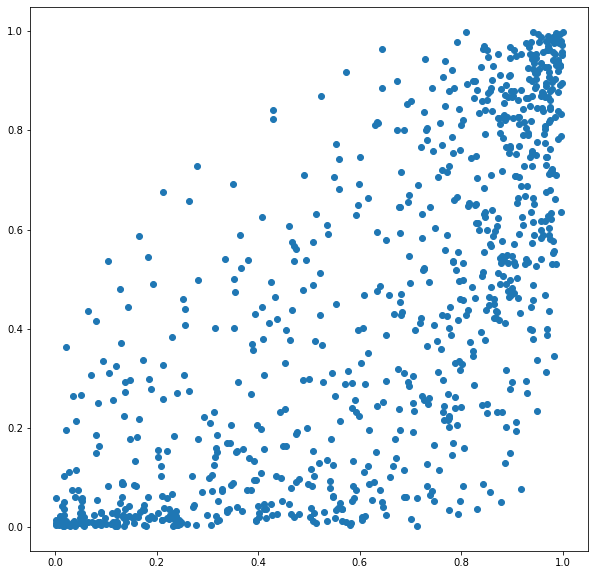

In [18]:
svi1 = svi['RPL_THEME1']
svi2 = svi['RPL_THEME2']

fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(svi1, svi2)

Conducting K-means clustering is very straightforward. You just need to specify the number of clusters in the `KMeans()` function, and then feed the function with the array you would like to cluster. 

In [19]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(svi[['RPL_THEME1', 'RPL_THEME2']])

# `.labels_` attribute provides which cluster each observation is assigned to
kmeans.labels_

array([0, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 3, 0, 1, 1, 1, 1, 1, 0, 1, 0, 3, 1, 0, 1, 3, 1, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0,
       0, 3, 2, 3, 0, 0, 1, 3, 3, 2, 3, 2, 2, 0, 2, 3, 2, 2, 3, 2, 2, 2,
       2, 0, 3, 2, 2, 2, 3, 2, 0, 0, 3, 3, 3, 3, 2, 1, 1, 3, 0, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 0, 2, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 1, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 0, 0, 0, 1, 1,
       3, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 3, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,

In [20]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

svi['label'] = kmeans.labels_
svi['color'] = ''

# Assign colors based on the clustering result
for idx, row in svi.iterrows():
    if row['label'] == 0:
        svi.at[idx, 'color'] = colors[0]
    elif row['label'] == 1:
        svi.at[idx, 'color'] = colors[1]
    elif row['label'] == 2:
        svi.at[idx, 'color'] = colors[2]
    elif row['label'] == 3:
        svi.at[idx, 'color'] = colors[3]
    elif row['label'] == 4:
        svi.at[idx, 'color'] = colors[4]
        
# or 
svi['color'] = svi.apply(lambda x:colors[x['label']], axis=1)

In [21]:
# `.cluster_centers_` provides the center of each cluster
kmeans.cluster_centers_

array([[0.59594718, 0.17591897],
       [0.16265819, 0.10234052],
       [0.89527331, 0.86136483],
       [0.79462972, 0.52493585]])

In [22]:
kmeans.cluster_centers_.transpose()[0]

array([0.59594718, 0.16265819, 0.89527331, 0.79462972])

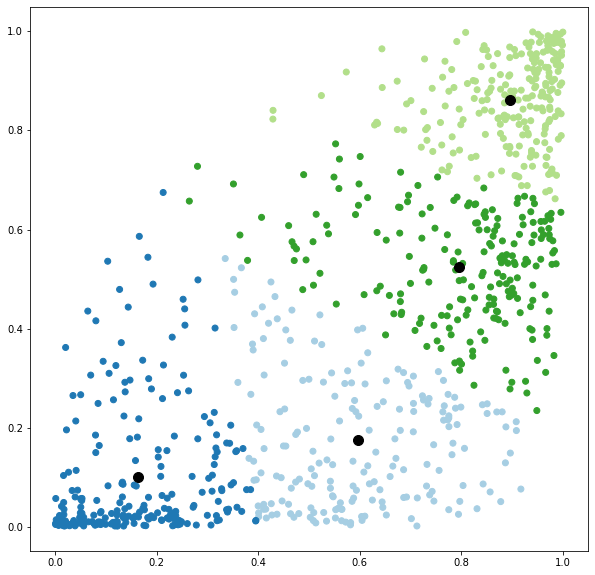

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))

# Observations that are colored based on their clustering result
ax.scatter(svi1, svi2, color=svi['color'])

# Center of each cluster
ax.scatter(kmeans.cluster_centers_.transpose()[0], 
           kmeans.cluster_centers_.transpose()[1], 
           color='black', s=100
          )

<AxesSubplot:>

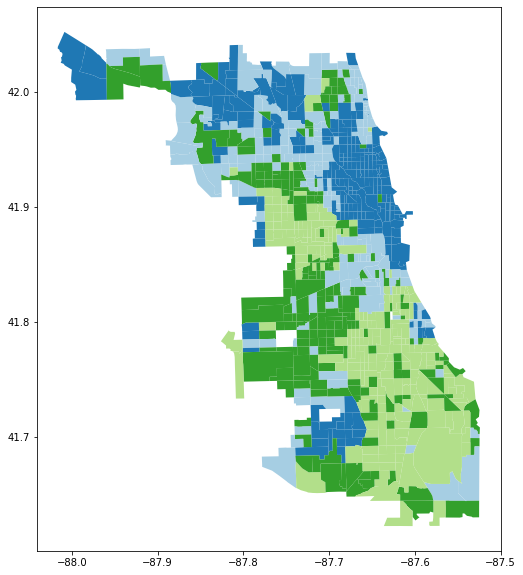

In [24]:
svi.plot(color=svi['color'], figsize=(10,10))

How can we implement K-means clustering with 3D array? 

In [25]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(svi[['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3']])
kmeans.labels_

array([2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0,

In [27]:
svi['label'] = kmeans.labels_
svi['color'] = svi.apply(lambda x:colors[x['label']], axis=1)

<IPython.core.display.Javascript object>


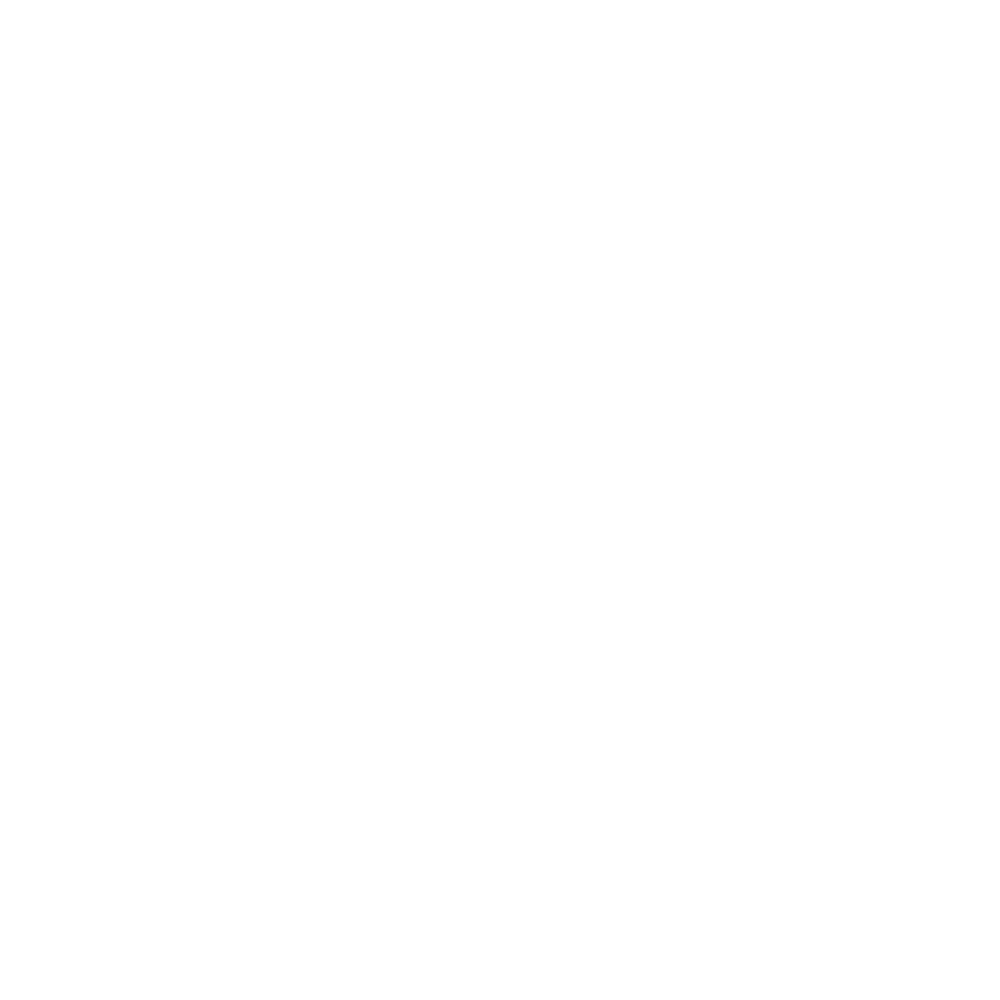

In [28]:
%matplotlib notebook  
fig = plt.figure( figsize=(10,10))
ax = plt.axes(projection='3d')
# Observations that are colored based on their clustering result
ax.scatter3D(svi['RPL_THEME1'], svi['RPL_THEME2'], svi['RPL_THEME3'], color=svi['color'])

# Center of each cluster
ax.scatter3D(kmeans.cluster_centers_.transpose()[0], 
             kmeans.cluster_centers_.transpose()[1], 
             kmeans.cluster_centers_.transpose()[2], 
             color='black',
             s=50
            )

<AxesSubplot:>

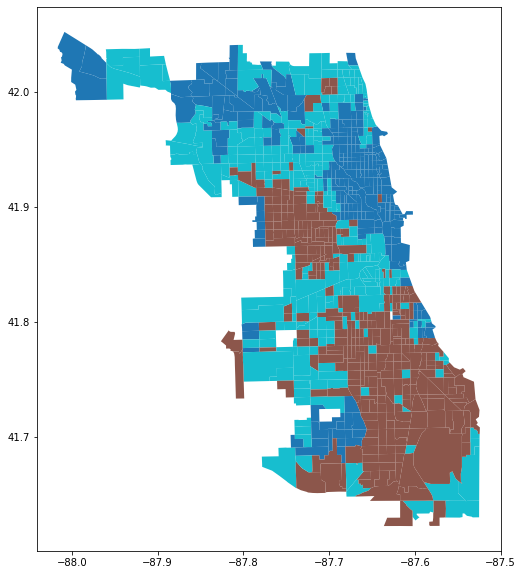

In [29]:
%matplotlib inline
svi.plot(svi['color'], figsize=(10,10))

What if we consider every variable? 

<AxesSubplot:>

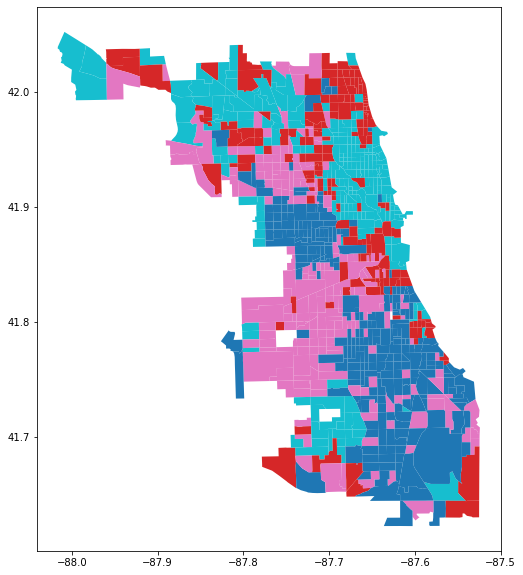

In [30]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(svi[['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']])

svi['label'] = kmeans.labels_
svi['color'] = svi.apply(lambda x:colors[x['label']], axis=1)

svi.plot(svi['color'], figsize=(10,10))

Or, it is also possible to conduct K-means for 1-D array.

In [31]:
kmeans.cluster_centers_.transpose()

array([[0.76863555, 0.88755212, 0.17767669, 0.58995621],
       [0.45951374, 0.83594556, 0.11048263, 0.1957071 ],
       [0.86467109, 0.68837838, 0.49513263, 0.78238817],
       [0.38752938, 0.60937529, 0.43064831, 0.77704497]])

/Users/jparkgeo/opt/anaconda3/envs/geog489/lib/python3.10/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


<AxesSubplot:>

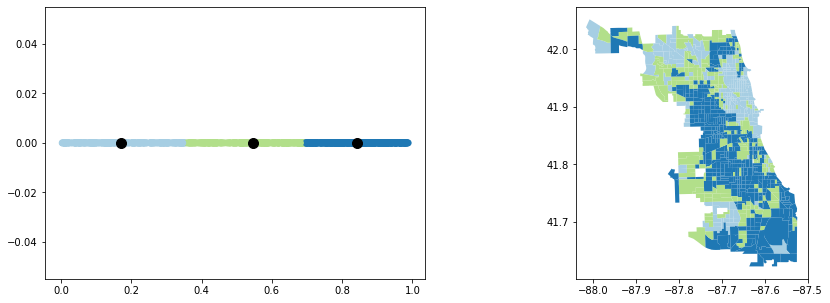

In [32]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(svi[['RPL_THEMES']])

svi['label'] = kmeans.labels_
svi['color'] = svi.apply(lambda x:colors[x['label']], axis=1)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Observations that are colored based on their clustering result
ax[0].scatter(svi[['RPL_THEMES']], [0 for i in range(len(svi['RPL_THEMES']))], color=svi['color'])

# Center of each cluster
ax[0].scatter(kmeans.cluster_centers_.transpose()[0], 
              [0 for i in range(len(kmeans.cluster_centers_.transpose()[0]))],
              color='black', s=100
             )

svi.plot('label', ax=ax[1], color=svi['color'])

How can we determine the **optimal number of clusters**, given that the quality of K-Means clustering is indicated by the number of clusters (i.e. K) as a direct correlation?

There is a method called, **Silhouette Method**, which evaluates the current partitioning of distribution based on the equation below. 

$$ S = \frac{1}{N}\sum_{i}^{N}\frac{b(i)- a(i)}{\text{max}{\left\{ a(i), b(i) \right\}}}$$

where<br>
$S$: the average Silhouette coefficients of current partitioning. <br>
$N$: the number of points. <br>
$a(i)$: a cohesion indicator of a point i (i.e. distances from point i to all other points in the same cluster). <br>
$b(i)$: a separation indicator of a point i (i.e. distances from point i to all points in the other clusters). <br>
$d_0$: the threshold travel cost of the analysis. 

The Silhouette method considers both within-cluster variation and between-cluster variation, and a **higher average Silhouette coefficient (i.e. S)** means that the current clustering is well classified.

For more information, please visit <a href=https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html>`sklearn.metrics.silhouette_score`</a>. 

In [33]:
from sklearn.metrics import silhouette_score

def determine_number_of_cluster(array):
    km_silhouette = []

    for i in range(2, 11):
        KM = KMeans(n_clusters=i, max_iter=999)
        KM.fit(array)

        # Calculate Silhouette Scores
        preds = KM.predict(array)
        silhouette = silhouette_score(array, preds)
        km_silhouette.append(silhouette)

    return km_silhouette

In [34]:
k_means_silhoutte = determine_number_of_cluster(svi[['RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4']])
k_means_silhoutte

[0.40058737376397907,
 0.3148766871980787,
 0.2976904847238562,
 0.2721331797250999,
 0.2780336083247479,
 0.2834412018329686,
 0.2686875946875222,
 0.2786030779726907,
 0.2674139165047051]

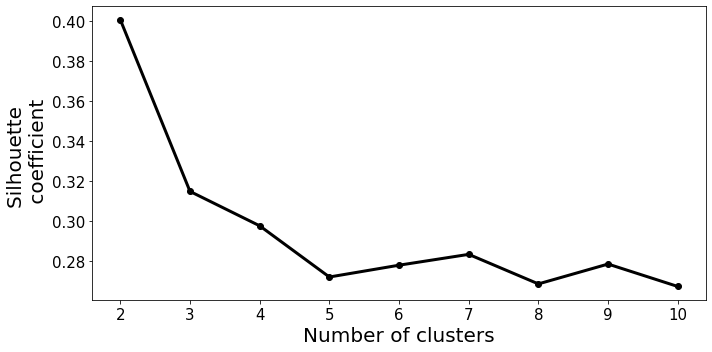

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(range(2, 11), k_means_silhoutte, color='black', linewidth='3', marker='o', linestyle='solid')

ax.set_ylabel(f'Silhouette \n coefficient', rotation='vertical', fontsize=20)
ax.set_xlabel('Number of clusters', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

### Hierarchical clustering

The hierarchical clustering method is initiated with every individual element (i.e. each hour in our application), aggregating observations into a higher cluster based on the distances between them (i.e. similarity). Different from the results of K-means clustering are subject to change based on K, hierarchical clustering can employ multiple linkage criteria (e.g. single, complete, or Ward’s method) to pursue the optimal results depending on the situation. 

For more information, please visit <a href=https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html>`scipy.cluster.hierarchy.linkage`</a>. 

In [36]:
from scipy.cluster import hierarchy

First linkage method to investigate is **single**, which is defined as below. 

$$d(u, v) = \text{min}\left ( dist\left (u\left [ i \right ], v\left [ j \right ] \right) \right )$$

where<br>
$i$: all points in cluster $u$ <br>
$j$: all points in cluster $v$ <br>

This linkage criteria is also known as Nearest Point Algorithm. 

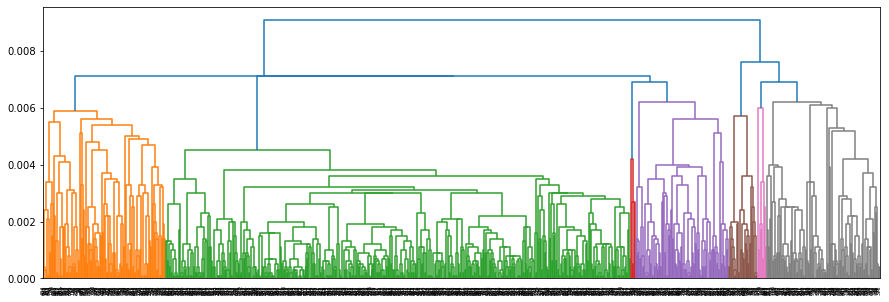

In [37]:
Z = hierarchy.linkage(svi[['RPL_THEMES']], method='single')

fig, ax = plt.subplots(figsize=(15, 5))
dn = hierarchy.dendrogram(Z=Z, ax=ax)

The next linkage method to investigate is **complete**, which is defined as below. 

$$d(u, v) = \text{max}\left ( dist\left (u\left [ i \right ], v\left [ j \right ] \right) \right )$$

where<br>
$i$: all points in cluster $u$ <br>
$j$: all points in cluster $v$ <br>

This linkage criteria is also known as the Farthest Point Algorithm or Voor Hees Algorithm.

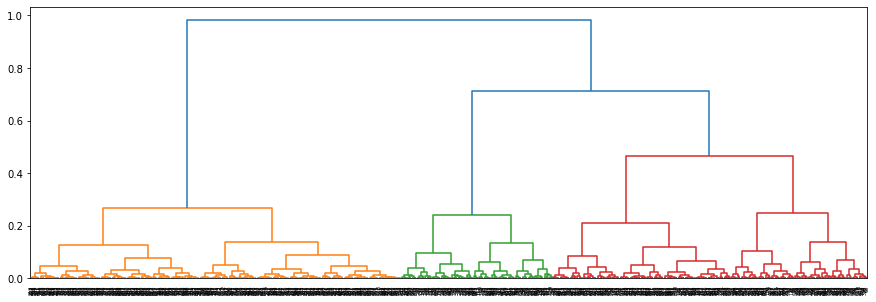

In [38]:
Z = hierarchy.linkage(svi[['RPL_THEMES']], method='complete')

fig, ax = plt.subplots(figsize=(15, 5))
dn = hierarchy.dendrogram(Z=Z, ax=ax)

The last linkage criteria to investigate is **Ward's method**, in which the total within-cluster variance is minimized.

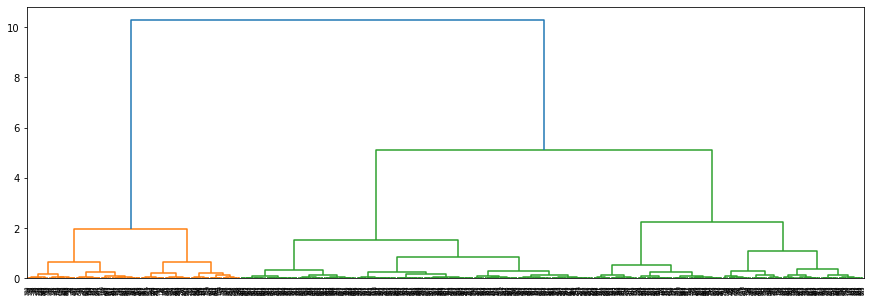

In [39]:
Z = hierarchy.linkage(svi[['RPL_THEMES']], method='ward')

fig, ax = plt.subplots(figsize=(15, 5))
dn = hierarchy.dendrogram(Z=Z, ax=ax)

In general, hierarchical clustering does not indicate the optimal number of clusters, and it rather shows how the clustering aggregates. To assign geographical locations to each cluster, you need to employ `sklearn.cluster.AgglomerativeClustering()` method. In this method, you will specify how many clusters you want to have. You can reference the resulted dendrogram to come up with the optimal number of clusters. 

<AxesSubplot:>

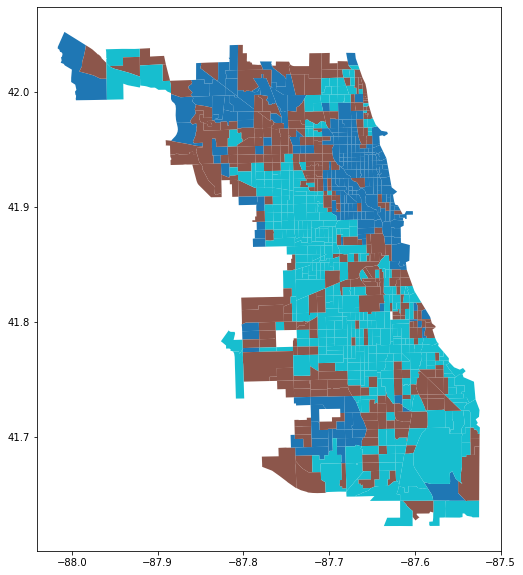

In [40]:
agg_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(svi[['RPL_THEMES']])

svi['label'] = agg_cluster.labels_
svi['color'] = svi.apply(lambda x:colors[x['label']], axis=1)

svi.plot(svi['color'], figsize=(10,10))